In [26]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn .model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV

# Prepare

In [3]:
# Data
df = pd.read_csv("../datas/Hitters.csv")
df = df.dropna()
df.head(3)

# Dummie
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1)
X = pd.concat([X, dms[["League_N", "Division_W", "NewLeague_N"]]], axis=1)

# Test Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

# Model

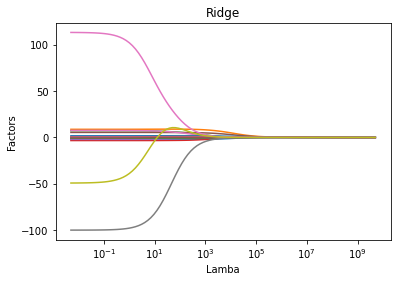

In [21]:
lambdas = 10**np.linspace(10,-2,100)*0.5
factors = []

for i in lambdas:
    ridge_model = Ridge(alpha=i).fit(X_train, y_train)
    factors.append(ridge_model.coef_)

ax = plt.gca()
ax.plot(lambdas, factors)
ax.set_xscale('log')

plt.xlabel('Lamba')
plt.ylabel('Factors')
plt.title('Ridge');

# Predict

In [24]:
y_pred_test = ridge_model.predict(X_test)
print(f"R2 Score: {np.sqrt(r2_score(y_test, y_pred_test))}\n"
      f"MSE Score: {np.sqrt(mean_squared_error(y_test, y_pred_test))}")

R2 Score: 0.6411587092965059
MSE Score: 357.0517922282843


# Model Tuning 

In [44]:
ridge_cv = RidgeCV(alphas = lambdas, 
                      scoring = "neg_mean_squared_error", 
                      normalize=True).fit(X_train, y_train)
print("Optimized Alpha:",ridge_cv.alpha_)

ridge_tuned =  Ridge(alpha=ridge_cv.alpha_, normalize=True).fit(X_train, y_train)

print(f"R2 Score: {np.sqrt(r2_score(y_test, ridge_tuned.predict(X_test)))}\n"
      f"MSE Score: {np.sqrt(mean_squared_error(y_test, ridge_tuned.predict(X_test)))}")

Optimized Alpha: 0.7599555414764666
R2 Score: 0.5561325091145405
MSE Score: 386.6826429756415
